# 1 - Attributes

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)

2 sex - student's sex (binary: "F" - female or "M" - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: "U" - urban or "R" - rural)

5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)

6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)

7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")

12 guardian - student's guardian (nominal: "mother", "father" or "other")

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 
to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)

# 2 - Grades 

Grades are related with the course subject, Math or Portuguese:

31 G1 - first period grade (numeric: from 0 to 20)

31 G2 - second period grade (numeric: from 0 to 20)

32 G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets . 
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.

Inityally, we won't need to search for duplicate students, as we'll try to predict if the student final grade will be enough to be approved.

But, we'll then try to check if the performance in one subject affects the other one.


*For a Final Grade >10 the studen will succeed.*

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df_math = pd.read_csv("student-mat.csv")

In [3]:
df_port = pd.read_csv("student-por.csv")

In [4]:
df_port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
df_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# 3 - Data Check
#     3.1 - Features - School 

Before we process some cleanup and data transformation, let's first try to check some data with relation to the final grade.

In [7]:
df_math['school'].value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [8]:
import seaborn as sns

In [9]:
df_math[['school','G3']].groupby(df_math['school'],as_index=True).mean()

,G3
school,
GP,10.489971
MS,9.847826


Both schools have a close Math mean

In [10]:
df_math[['school','G3']].groupby(df_math['school'],as_index=True).std()

,G3
school,
GP,4.625397
MS,4.237229


And a very similar Std, despite having a higher mean grade, GP School also have a higher std

But they have a high standart deviation (this may affect the model performance), meaning that many students will fail in math. Let's check with portuguese

In [11]:
df_port[['school','G3']].groupby(df_port['school'],as_index=True).mean()

,G3
school,
GP,12.576832
MS,10.650442


In [12]:
df_port[['school','G3']].groupby(df_port['school'],as_index=True).std()

,G3
school,
GP,2.625636
MS,3.833991


In [13]:
df_port['school'].value_counts()

GP    423
MS    226
Name: school, dtype: int64

In Portuguese, students have a higher mean grade and a smaller standart deviation, we expect less students to fail in potuguese.

This analysis was usefull, but it seems that the school from where the student participate does not affect the grade at all, means and std for both schools are very similar, let's check visually just to be sure.

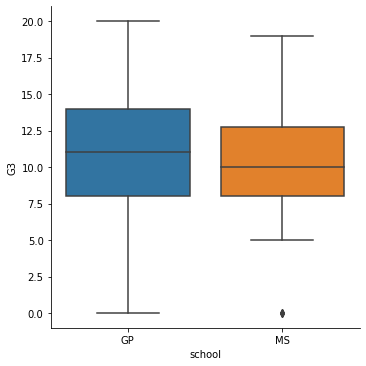

In [14]:
sns.catplot(x="school",y="G3", kind="box",data=df_math)

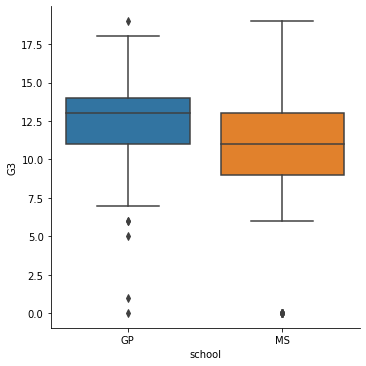

In [15]:
sns.catplot(x="school",y="G3", kind="box",data=df_port)

In [16]:
def remove_math_features(list_features):
    for i in list_features:
        df_math.drop(i,axis=1, inplace=True)
    return print("Features removed")        

In [17]:
def remove_port_features(list_features):
    for i in list_features:
        df_port.drop(i,axis=1, inplace=True)
    return print("Features removed")    

## Choice - School

*Keep school feature in Portuguese, remove from math*

#      3.2 - Features - Sex

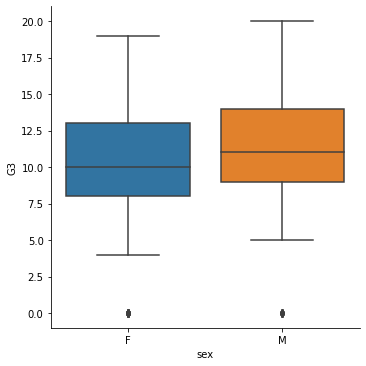

In [18]:
sns.catplot(x="sex",y="G3",kind="box",data=df_math)

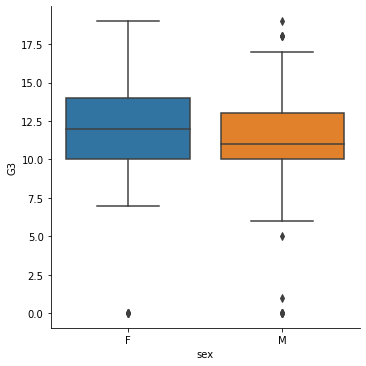

In [19]:
sns.catplot(x="sex",y="G3",kind="box",data=df_port)

## Choice - Sex 

*Keep Sex Feature*

We can see a difference in both subjects for male and female. Female tend to perform better in Portuguse, while Male tend to perform better in Math. This can be an useful insight for the school and provide extra courses and material for genre that has a lower score, while improving the high score.

#      3.3 - Features - Age

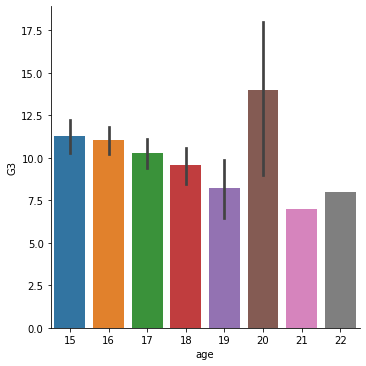

In [20]:
sns.catplot(x="age",y="G3",kind="bar",data=df_math)

Very different grade average mean for all ages. Edit just a bit.

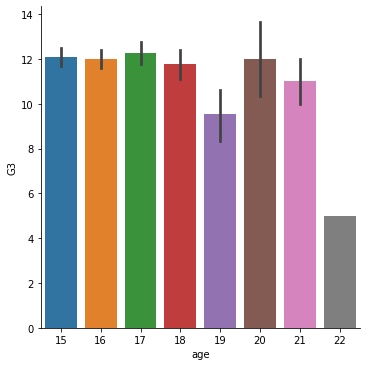

In [21]:
sns.catplot(x="age",y="G3",kind="bar",data=df_port)

## Choice - Age

*Keeg age feature, but edit on portuguese*

There's a very similar approval rate for ages 15-18. And then start varying from >19. The small grades for 22 may be related to evasion.


# 3.4 - Features - Address

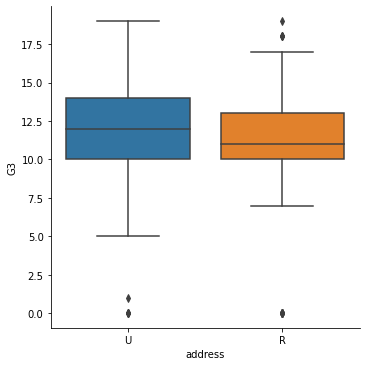

In [22]:
sns.catplot(x="address",y="G3", kind="box",data=df_port)

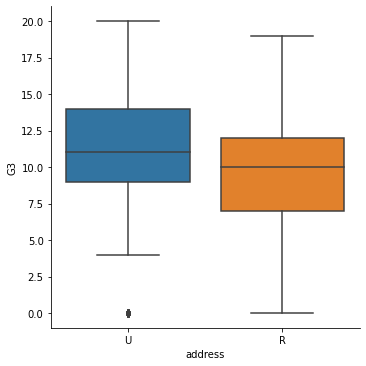

In [23]:
sns.catplot(x="address",y="G3", kind="box",data=df_math)

## Choice - Address

*We'll maintain this feature, since Rural students tend to perform a bit worse.*

# 3.5 - Features - Family Size

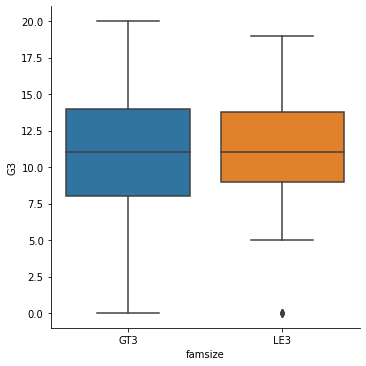

In [24]:
sns.catplot(x="famsize",y="G3", kind="box",data=df_math)

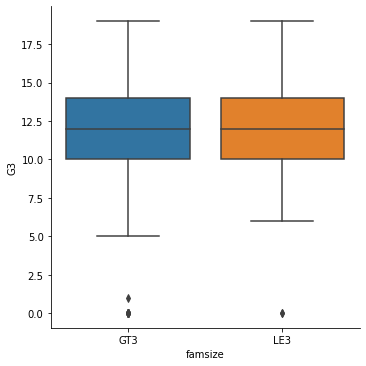

In [25]:
sns.catplot(x="famsize",y="G3", kind="box",data=df_port)

## Choice - Family Size

*famsize will be removed*

*Despite having a higher variance for family with more than 3 members in math. This feature seems to not be useful, there's no great differente between students with different family sizes (Specially in Portuguese).*

# 3.6 - Features - Parental Status

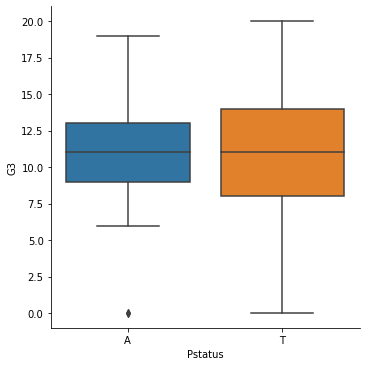

In [26]:
sns.catplot(x="Pstatus",y="G3", kind="box",data=df_math)

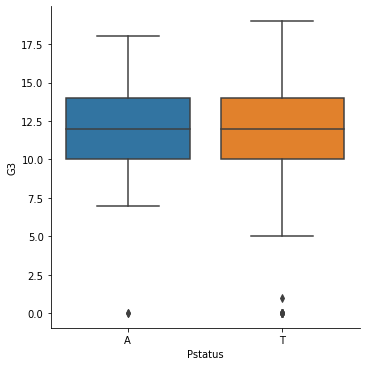

In [27]:
sns.catplot(x="Pstatus",y="G3", kind="box",data=df_port)

## Choice - Parental Status

*This is very similar to the previous feature, math has a higher variance, but very close mean.*
*Pstatus will be removed*

# 3.7 - Features - Mother Education

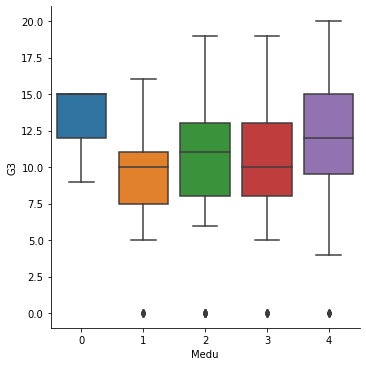

In [28]:
sns.catplot(x="Medu",y="G3", kind="box",data=df_math)

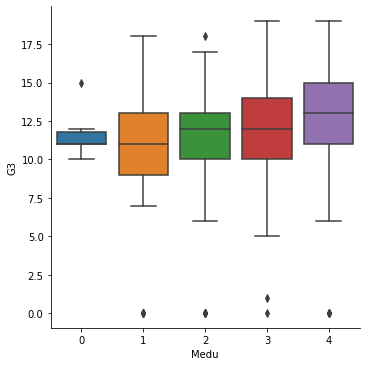

In [29]:
sns.catplot(x="Medu",y="G3", kind="box",data=df_port)

## Choice - Mother Education

*It seems that the greater the mother education, the student has greater grades.*

*Keep Medu feature*

# 3.8 - Features - Father Education influence

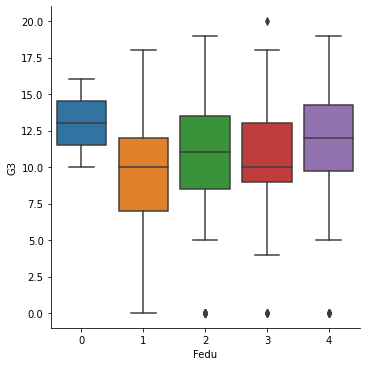

In [30]:
sns.catplot(x="Fedu",y="G3", kind="box",data=df_math)

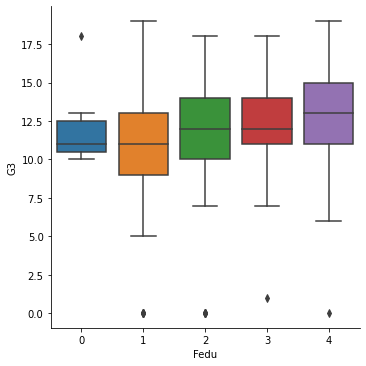

In [31]:
sns.catplot(x="Fedu",y="G3", kind="box",data=df_port)

## Choice - Father Education

*It seems that the greater the Father education, the student has greater grades.*

*Keep Fedu feature, edit it*

# 3.9 - Features - Mother Job

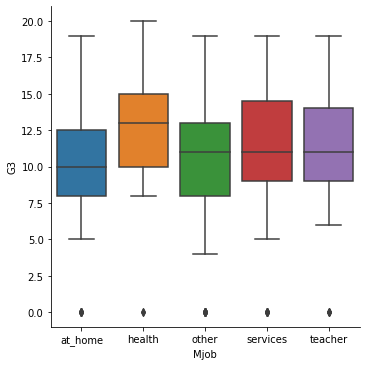

In [32]:
sns.catplot(x="Mjob",y="G3", kind="box",data=df_math)

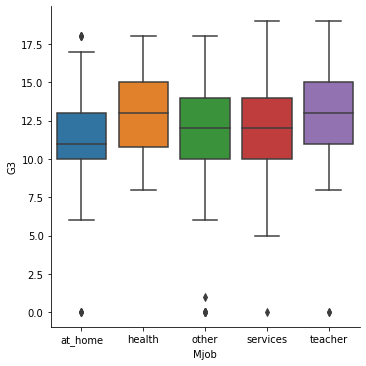

In [33]:
sns.catplot(x="Mjob",y="G3", kind="box",data=df_port)

## Choice - Mother Job

*Surely the mother influence the grade of a student*

*Keep Mjob feature*

# 3.10 - Features - Father Job

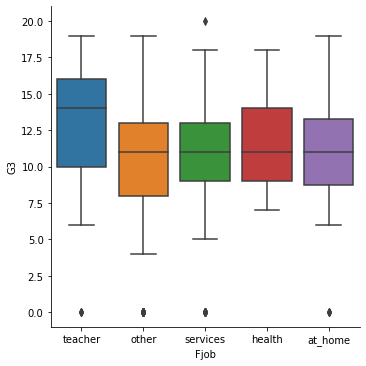

In [34]:
sns.catplot(x="Fjob",y="G3", kind="box",data=df_math)

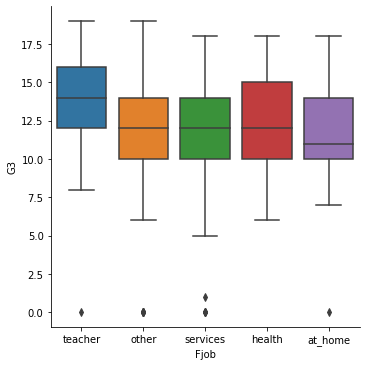

In [35]:
sns.catplot(x="Fjob",y="G3", kind="box",data=df_port)

## Choice - Father Job

*The father job has a less difference in most jobs, but it takes a nice increase in both Portuguese and Math. We'll convert teacher as one category and the rest as other.*

*Keep Fjob feature, but edit it*

# 3.11 - Features - Reason

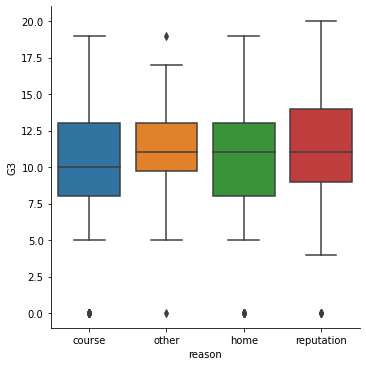

In [36]:
sns.catplot(x="reason",y="G3", kind="box",data=df_math)

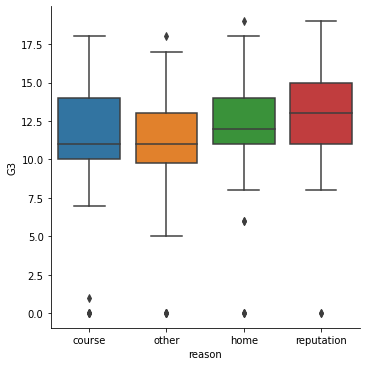

In [37]:
sns.catplot(x="reason",y="G3", kind="box",data=df_port)

## Choice - Reason

*Despite having a different mean in portuguese, I'll remove this feature it doesn't add significance to the model*
*Remove reason feature* But check correlation, I don't think it's a good feature*

# 3.12 - Features - Guardian

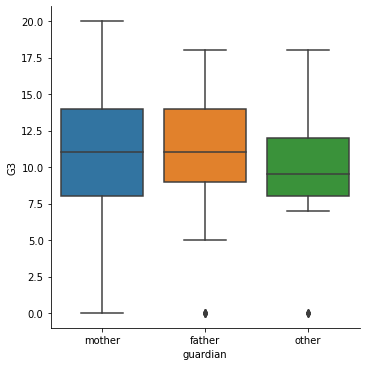

In [38]:
sns.catplot(x="guardian",y="G3", kind="box",data=df_math)

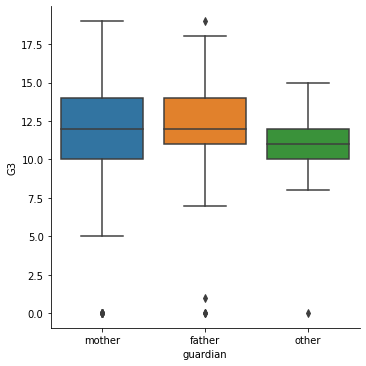

In [39]:
sns.catplot(x="guardian",y="G3", kind="box",data=df_port)

## Choice - Guardian
*We can clearly see that the mean grade of the student decrease if "others" are guardian, also means are very similar if either mother and father are the guardian.*

*Keep feature, edit grouping mother and father*

# 3.13 - Feature - Travel time

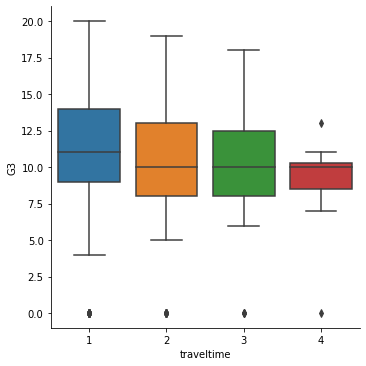

In [40]:
sns.catplot(x="traveltime",y="G3", kind="box",data=df_math)

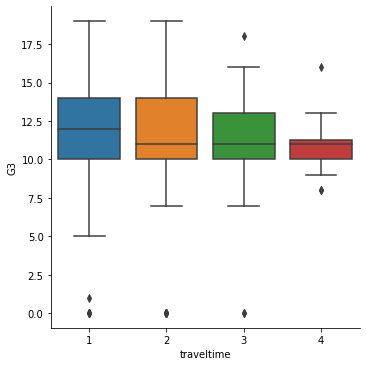

In [41]:
sns.catplot(x="traveltime",y="G3", kind="box",data=df_port)

## Choice - Travel Time

There's no significant difference if the student take more than 15 minutes to arrive the school (2,3,4 are close in mean)

However, the close to school, the mean is higher.

*Keep feature, but group 2,3,4 into 2.*

# 3.14 - Features - Study Time

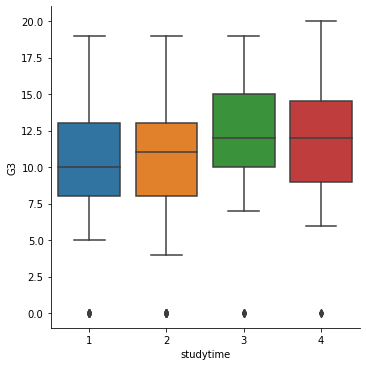

In [42]:
sns.catplot(x="studytime",y="G3", kind="box",data=df_math)

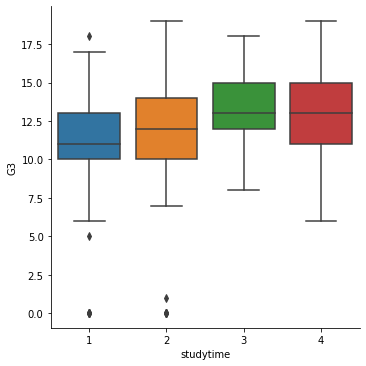

In [43]:
sns.catplot(x="studytime",y="G3", kind="box",data=df_port)

## Choice - Study Time

*As we imagined, the more the student study higher the grade. But after 3 (5-10 hours) there's no significant improvement on the grade.*
*Keep feature, but group 3,4 into 3*

# 3.15 - Features - Failures

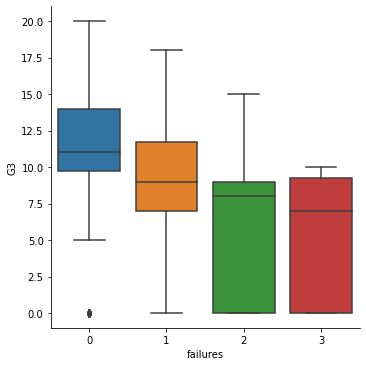

In [44]:
sns.catplot(x="failures",y="G3", kind="box",data=df_math)

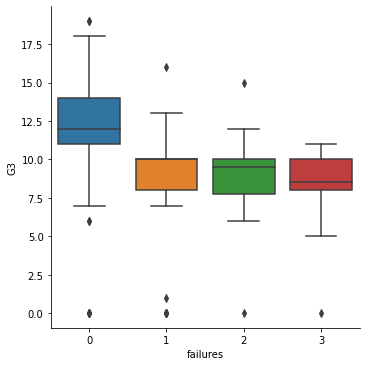

In [45]:
sns.catplot(x="failures",y="G3", kind="box",data=df_port)

## Choice - Failures

*The less the student fails, the bigger the grade.*
*Keep feature, but watch out because math data has a huge variance for more than 2 failures.*

# 3.16 - Features - School Support

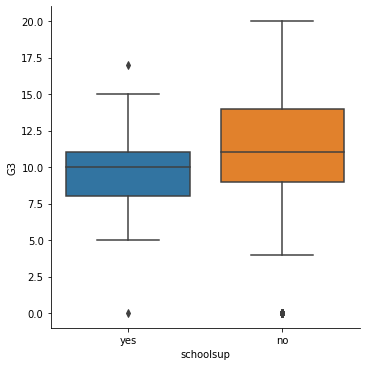

In [46]:
sns.catplot(x="schoolsup",y="G3", kind="box",data=df_math)

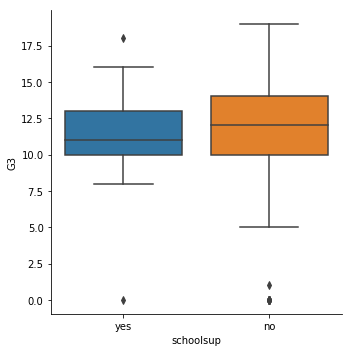

In [46]:
sns.catplot(x="schoolsup",y="G3", kind="box",data=df_port)

## Choice - School Support
*The students that have a lower grade, obviusly need more school support. We'll keep this feature.*
*Keep schoolsup feature*

# 3.17 - Features - Family Support

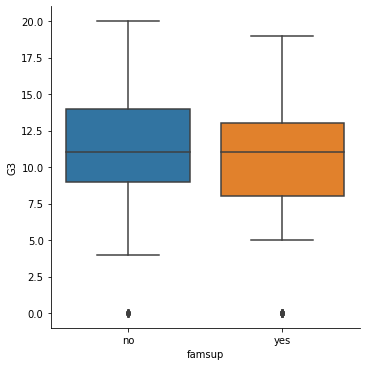

In [47]:
sns.catplot(x="famsup",y="G3", kind="box",data=df_math)

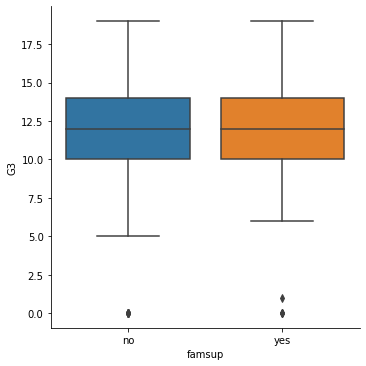

In [48]:
sns.catplot(x="famsup",y="G3", kind="box",data=df_port)

## Choice Family Support

*There's no big difference for students who had family education support and those who hadn't. *
*Remove famsup feature*

# 3.18 - Features - Extra Classes

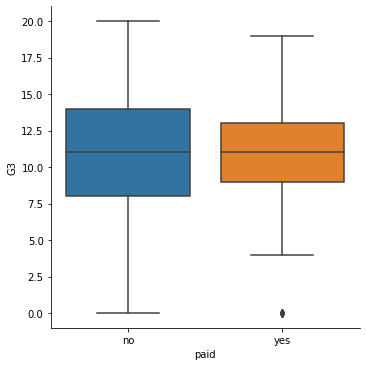

In [49]:
sns.catplot(x="paid",y="G3", kind="box",data=df_math)

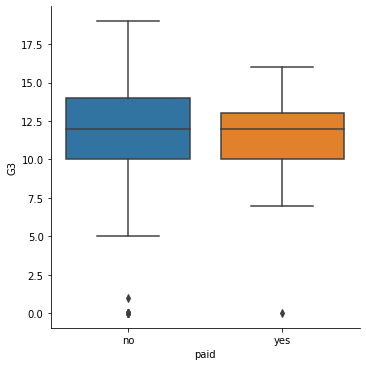

In [50]:
sns.catplot(x="paid",y="G3", kind="box",data=df_port)

## Choice - Extra Classes
*For my suprise, it didn't, the mean is the same, despite the smaller variance for those who paid, I'll remove this feature.*
*Remove paid feature*

# 3.19 - Features - Extra Activities

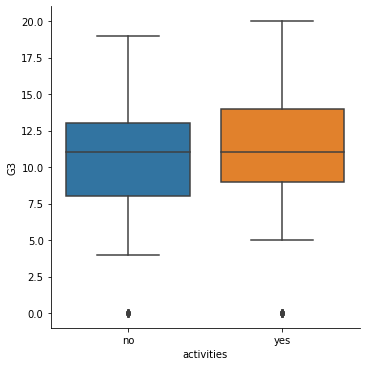

In [51]:
sns.catplot(x="activities",y="G3", kind="box",data=df_math)

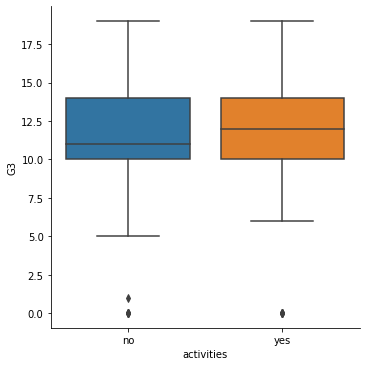

In [52]:
sns.catplot(x="activities",y="G3", kind="box",data=df_port)

## Choice Extra Activities
*The feature doesn't seem to add on the math data, but it has a bigger difference on in the port data.*
*Remove activities feature from math dataset and maintain in the portuguese*

# 3.20 - Features - Nursery School

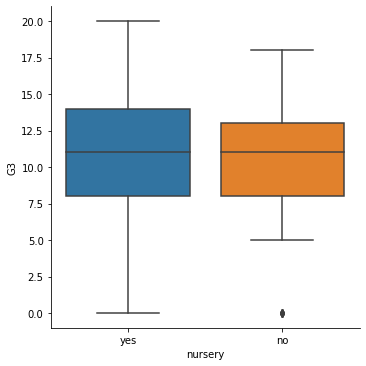

In [53]:
sns.catplot(x="nursery",y="G3", kind="box",data=df_math)

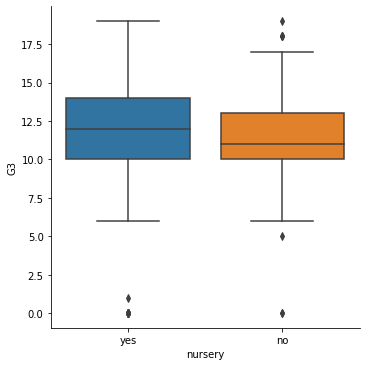

In [54]:
sns.catplot(x="nursery",y="G3", kind="box",data=df_port)

## Choice - Nursery
*The feature doesn't seem to add on the math data, but it has a bigger difference on in the port data.*
*Remove nursery feature from math dataset and maintain in the portuguese*

# 3.21 Features - Higher Education

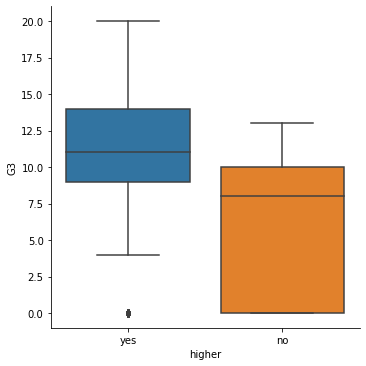

In [55]:
sns.catplot(x="higher",y="G3", kind="box",data=df_math)

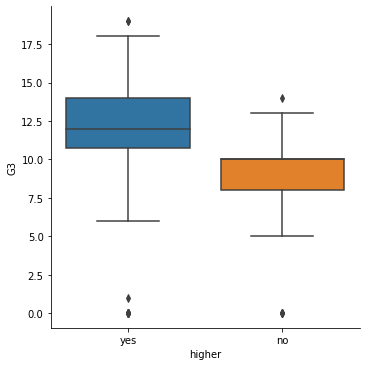

In [56]:
sns.catplot(x="higher",y="G3", kind="box",data=df_port)

## Choice - Higher Education
*Those who want higher education are clearly doing better, keep it.*

# 3.22 Features - Internet Acess

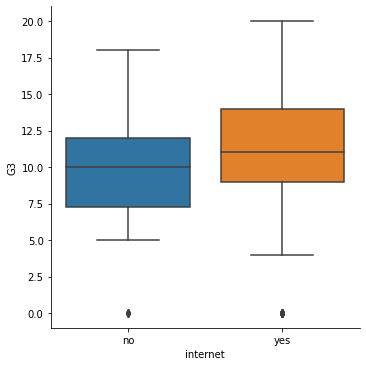

In [57]:
sns.catplot(x="internet",y="G3", kind="box",data=df_math)

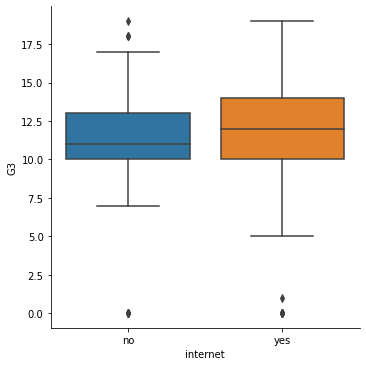

In [58]:
sns.catplot(x="internet",y="G3", kind="box",data=df_port)

## Choice - Internet Acess
*The internet acess has a positive influence in the final grade of a student.*
*Keep internet feature*

# 3.23 - Features - Romantic Relationship

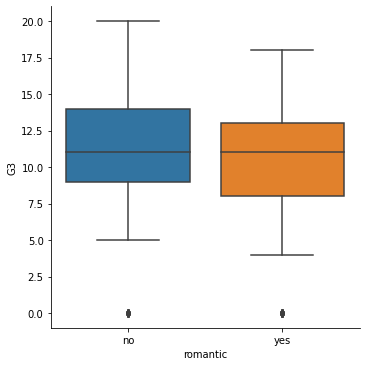

In [59]:
sns.catplot(x="romantic",y="G3", kind="box",data=df_math)

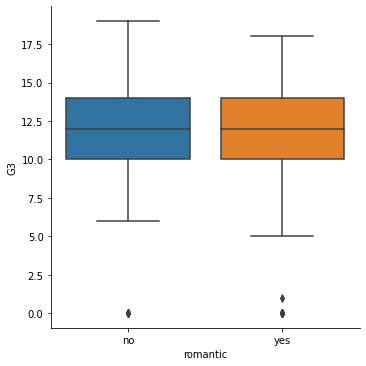

In [60]:
sns.catplot(x="romantic",y="G3", kind="box",data=df_port)

## Choice - Romantic Relationship
*The romantic feature doesn't add much to the model, it makes no difference if the person is either in a relation or not.*
*Remove romantic*

# 3.24 - Features - Family Relationship

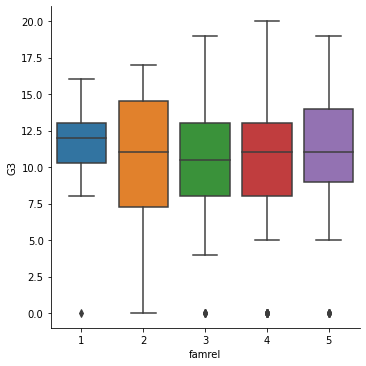

In [61]:
sns.catplot(x="famrel",y="G3", kind="box",data=df_math)

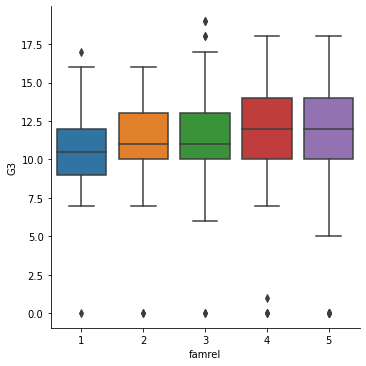

In [62]:
sns.catplot(x="famrel",y="G3", kind="box",data=df_port)

## Choice - Family Relationship
*It seems that there's no huge between a bad and an excellent family relation.*
*Remove famrel feature

# 3.25 - Features - Free time


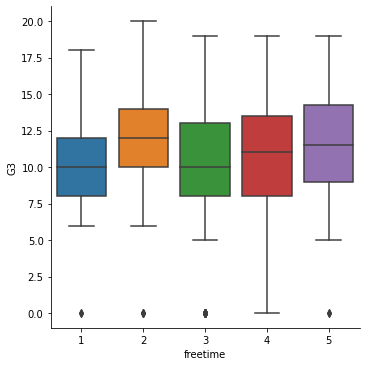

In [63]:
sns.catplot(x="freetime",y="G3", kind="box",data=df_math)

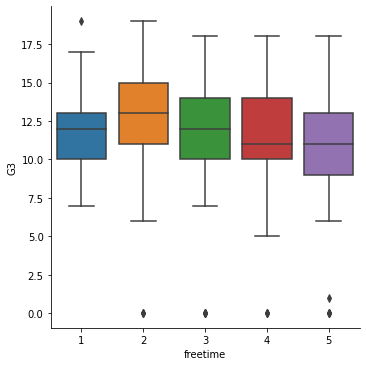

In [64]:
sns.catplot(x="freetime",y="G3", kind="box",data=df_port)

## Choice - Free Time
*This feature seems to have more divergent data from the amount of time the student have and the grade.*
*Check interference on model accuracy and decide to remove or keep it.

# 3.26 - Features - Going Out

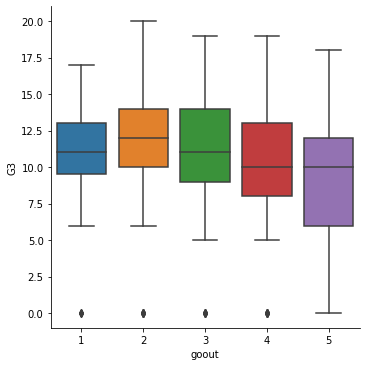

In [65]:
sns.catplot(x="goout",y="G3", kind="box",data=df_math)

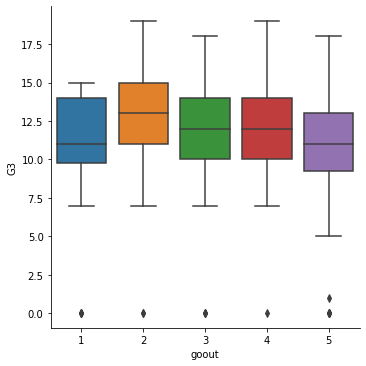

In [66]:
sns.catplot(x="goout",y="G3", kind="box",data=df_port)

## Choice - Going Out
*It seems that there's a trade-off between the time spent out. Higher minutes out mean a worse grade, but less minutes also means a worse grade. An average time has a higher grade, maybe this is related to a boost by spending just enough time going out and enjoying it.*
*Keep goout feature.*

# 3.27 - Features - Workday consumption of alchool

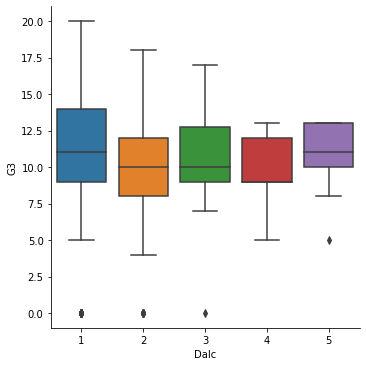

In [67]:
sns.catplot(x="Dalc",y="G3", kind="box",data=df_math)

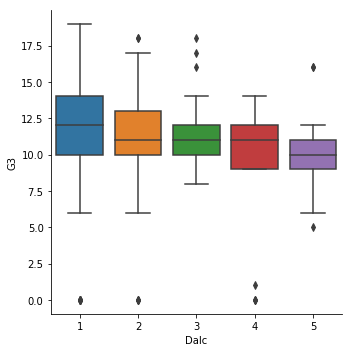

In [68]:
sns.catplot(x="Dalc",y="G3", kind="box",data=df_port)

## Choice - Workday consumption of alchool
*In portuguese, it's clear that the performance decreases, while in math is more confuse.*
*Keep feature, but edit the portguese one*

# 3.28 - Features - Weekend consumption of alchool

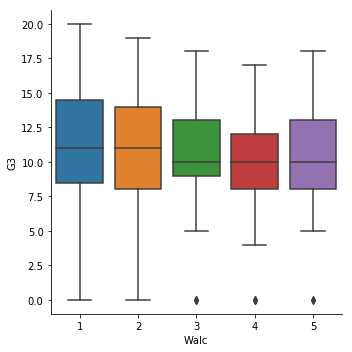

In [69]:
sns.catplot(x="Walc",y="G3", kind="box",data=df_math)

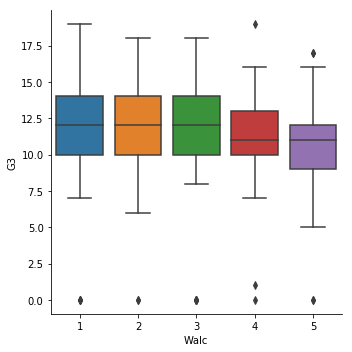

In [70]:
sns.catplot(x="Walc",y="G3", kind="box",data=df_port)

## Choice - Weekend consumption of alchool
*This feature is more precise, the mean grade decreases after a certain amount of alcohol consumption during the weekend.*
*Keep Walc feature, but edit (1-2,3-5) for Math and (1-3, 4-5) for Portuguese.*

# 3.29 - Features - Health

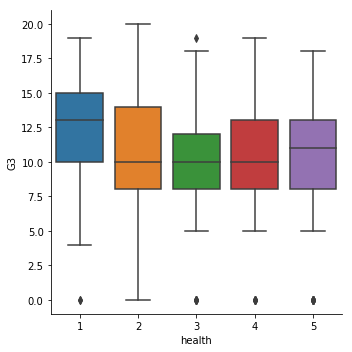

In [71]:
sns.catplot(x="health",y="G3", kind="box",data=df_math)

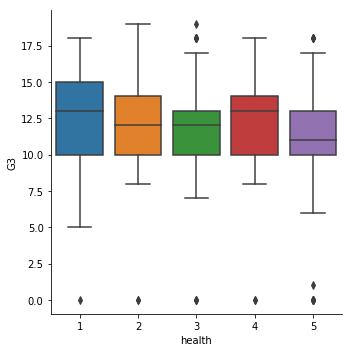

In [72]:
sns.catplot(x="health",y="G3", kind="box",data=df_port)

## Choice - Health
*Strangely, students with very bad health status have a higher grade.*
*For this reason, we'll keep this feature, but group the values together as the range 2-4 for Math and 2-3 for Portuguese have very close values.*

# 3.30 - Features - Absences

I believe this one has a huge influence on the student final grade. Since this feature has a wider range, I'll group it into a few bands.

In [69]:
df_math = pd.read_csv("student-mat.csv")

In [70]:
df_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [71]:
df_math['absencesband'] = pd.cut(df_math['absences'],10, duplicates='drop')

In [72]:
df_math['absencesband'].unique()

[(-0.075, 7.5], (7.5, 15.0], (15.0, 22.5], (22.5, 30.0], (52.5, 60.0], (67.5, 75.0], (37.5, 45.0]]
Categories (7, interval[float64]): [(-0.075, 7.5] < (7.5, 15.0] < (15.0, 22.5] < (22.5, 30.0] < (37.5, 45.0] < (52.5, 60.0] < (67.5, 75.0]]

In [73]:
df_math[['absencesband','G3']].groupby(df_math['absencesband'],as_index=False).count()

,absencesband,G3
0,287,287
1,75,75
2,22,22
3,6,6
4,0,0
5,2,2
6,0,0
7,2,2
8,0,0
9,1,1


In [74]:
df_math.loc[df_math['absences'] <= 15, 'absences' ] = 0
df_math.loc[(df_math['absences'] > 15) & (df_math['absences'] <= 23), 'absences' ] = 1
df_math.loc[df_math['absences'] > 23, 'absences' ] = 2

## Where 0 is equivalent to less than 15 absences
## 1 is equivalent to less than 23 absences and more than 15
## 3 is equivalent to more than 23


In [75]:
df_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,absencesband
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,0,5,6,6,"(-0.075, 7.5]"
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,0,5,5,6,"(-0.075, 7.5]"
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,0,7,8,10,"(7.5, 15.0]"
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,15,14,15,"(-0.075, 7.5]"
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,6,10,10,"(-0.075, 7.5]"


In [76]:
df_math[['absences','G3']].groupby(df_math['absences'],as_index=False).count()

,absences,G3
0,362,362
1,23,23
2,10,10


## Choice - Absence

*Edit into a absencesband feature*

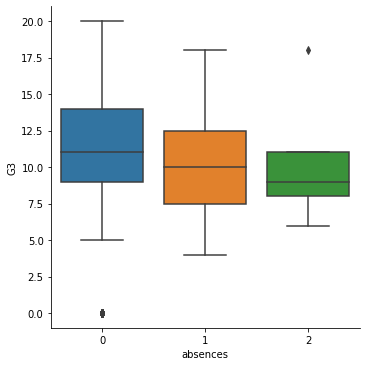

In [77]:
sns.catplot(x="absences",y="G3", kind="box",data=df_math)

After optmizing the absences band, we found this nice division, where we can see how the grade decreases as students are more absent

In [79]:
df_port = pd.read_csv("student-por.csv")

In [80]:
df_port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [81]:
df_port['absencesband'] = pd.cut(df_port['absences'],8, duplicates='drop')

In [82]:
df_port['absencesband'].unique()

[(-0.032, 4.0], (4.0, 8.0], (8.0, 12.0], (12.0, 16.0], (20.0, 24.0], (28.0, 32.0], (16.0, 20.0], (24.0, 28.0]]
Categories (8, interval[float64]): [(-0.032, 4.0] < (4.0, 8.0] < (8.0, 12.0] < (12.0, 16.0] < (16.0, 20.0] < (20.0, 24.0] < (24.0, 28.0] < (28.0, 32.0]]

In [83]:
df_port[['absencesband','G3']].groupby(df_port['absencesband'],as_index=False).count()

,absencesband,G3
0,466,466
1,106,106
2,45,45
3,21,21
4,3,3
5,5,5
6,1,1
7,2,2


In [84]:
df_port.loc[df_port['absences'] <= 4, 'absences' ] = 0
df_port.loc[(df_port['absences'] > 4) & (df_port['absences'] <= 8), 'absences' ] = 1
df_port.loc[(df_port['absences'] > 8) & (df_port['absences'] <= 12), 'absences' ] = 2
df_port.loc[df_port['absences'] > 12, 'absences' ] = 3

In [85]:
df_port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,absencesband
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,0,0,11,11,"(-0.032, 4.0]"
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,0,9,11,11,"(-0.032, 4.0]"
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,1,12,13,12,"(4.0, 8.0]"
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,"(-0.032, 4.0]"
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,"(-0.032, 4.0]"


In [86]:
df_port[['absences','G3']].groupby(df_port['absences'],as_index=False).count()

,absences,G3
0,466,466
1,106,106
2,45,45
3,32,32


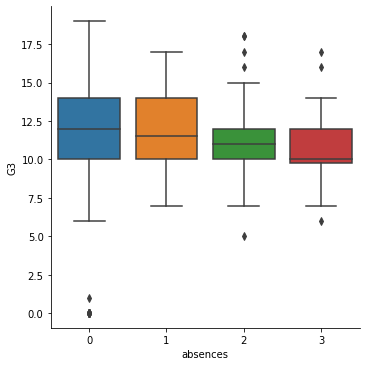

In [87]:
sns.catplot(x="absences",y="G3", kind="box",data=df_port)

After optmizing the absences band, we found this nice division, where we can see how the grade decreases as students are more absent

*Edit into a absencesband feature*

## We're now finally done with the analysis, let's first delete the the features from the Math and Portuguese

Remove in Math: school, famsize, Pstatus, famsup, paid, activities, nursery, romantic, famrel, absencesband

Remove in Portuguese: famsize, Pstatus, famsup, paid, activities, nursery, romantic, famrel, absencesband 

# Edit Math: 
	Age = '15-16'=0; '17'=1; '18'=2; '19'=3; '20'=4; '21'=5; '22'=6
	Medu = '1 & 3' = 1; '2'=2; '4'=3
	Fedu = '1 & 3' = 1; '2'=2; '4'=3
	Mjob = 'at_home'= 0; 'health'=1; 'other, services, teacher'=2
	Fjob = 'teacher'= 0; 'other, services, health, at_home'=1
	reason = 'course'=0; 'other, home, reputation'=1
	guardian = 'mother, father'=0; 'other=1'
	traveltime = '1'=0; '2,3,4'=1
	studytime = '1'=0; '2'=1; '3,4'=2
	failures = '2,3'=2
	freetime = '1'=0; '2'=1; '3'=2; '4,5'=3
	goout = '1'=0; '2'=1,'3'=2; '4,5'=3
	Dalc = '1'=0; '2,3'=1,'4'=2; '5'=3
	Walc = '1,2'=0; '3,4,5'=1
	health = '1'=0; '2,3,4'=1; '5'=2

# Edit Portuguese: 
    Age = '15-18'=0 ; '19'=1; '20'=2; '21'=3; '22'=4
	Medu =  '0-1'=0; '2-3'=1; '4'=2
	Fedu = '0-1'=0; '2-3'=1; '4'=2
	Mjob = 'at_home'= 0; 'health'=1; 'other, services'=2; 'teacher'=3
	Fjob = 'teacher'= 0; 'other, services, health'=1; 'at_home'=2
	reason = 'course, other'=0; 'home'=1;  'reputation'=2
	guardian = 'mother, father'=0; 'other=1'
	traveltime = '1'=0; '2,3,4'=1
	studytime = '1'=0; '2'=1; '3,4'=2
	freetime = '1'=0; '2'=1; '3'=2; '4,5'=3
	goout = '1'=0; '2'=1,'3,4'=2; '5'=3
	Dalc = '1'=0; '2,3,4'=1; '5'=2
	Walc = '1,2,3'=0; '4,5'=1
	health = '1 & 4'=0; '2,3'=1; '5'=2	


In [88]:
list_math = ['school','famsize', 'Pstatus', 'famsup', 'paid', 'activities', 'nursery', 'romantic', 'famrel', 'absencesband']
list_port = ['famsize', 'Pstatus', 'famsup', 'paid', 'activities', 'romantic', 'famrel', 'absencesband']

In [89]:
remove_math_features(list_math)

Features removed


In [90]:
remove_port_features(list_port)

Features removed


In [91]:
df_math.head()

,sex,age,address,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,...,internet,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,4,4,at_home,teacher,course,mother,2,...,no,3,4,1,1,3,0,5,6,6
1,F,17,U,1,1,at_home,other,course,father,1,...,yes,3,3,1,1,3,0,5,5,6
2,F,15,U,1,1,at_home,other,other,mother,1,...,yes,3,2,2,3,3,0,7,8,10
3,F,15,U,4,2,health,services,home,mother,1,...,yes,2,2,1,1,5,0,15,14,15
4,F,16,U,3,3,other,other,home,father,1,...,no,3,2,1,2,5,0,6,10,10


In [92]:
df_port.head()

,school,sex,age,address,Medu,Fedu,Mjob,Fjob,reason,guardian,...,internet,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,4,4,at_home,teacher,course,mother,...,no,3,4,1,1,3,0,0,11,11
1,GP,F,17,U,1,1,at_home,other,course,father,...,yes,3,3,1,1,3,0,9,11,11
2,GP,F,15,U,1,1,at_home,other,other,mother,...,yes,3,2,2,3,3,1,12,13,12
3,GP,F,15,U,4,2,health,services,home,mother,...,yes,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,3,3,other,other,home,father,...,no,3,2,1,2,5,0,11,13,13


In [93]:
df_math.columns

Index(['sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
       'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'higher', 'internet', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [94]:
df_port.columns

Index(['school', 'sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'nursery', 'higher', 'internet', 'freetime', 'goout',
       'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [98]:
## We'll now convert the categorical features into numerical features.
## We'll also group some numerical categories, as several different numerical features does not have a impact in the grade.

In [99]:
df_port['school'] = df_port['school'].map({'GP':1, 'MS':0})

In [100]:
df_math['sex'] = df_math['sex'].map({'M':0,'F':1})
df_port['sex'] = df_port['sex'].map({'M':0,'F':1})

In [101]:
df_math['address'] = df_math['address'].map({'U':1,'R':0})
df_port['address'] = df_port['address'].map({'U':1,'R':0})

In [102]:
df_math['age'] = df_math['age'].map({15:4, 16:4, 17:3, 18:2, 19:1, 20:5, 21:0, 22:1})
df_port['age'] = df_port['age'].map({15:3, 16:3, 17:3, 18:3, 19:1, 20:3, 21:2, 22:0})

In [103]:
df_math['Medu'] = df_math['Medu'].map({0:3, 1:0, 2:1, 3:0, 4:1})
df_port['Medu'] = df_port['Medu'].map({0:0, 1:0, 2:1, 3:1, 4:2})

In [104]:
df_math['Fedu'] = df_math['Fedu'].map({0:2, 1:0, 2:1, 3:0, 4:1})
df_port['Fedu'] = df_port['Fedu'].map({0:0, 1:0, 2:1, 3:1, 4:2})

In [105]:
df_math['Mjob'] = df_math['Mjob'].map({'at_home':0, 'health':2, 'other':1, 'services':1, 'teacher':1})
df_port['Mjob'] = df_port['Mjob'].map({'at_home':0, 'health':2, 'other':1, 'services':1, 'teacher':2})

In [106]:
df_math['Fjob'] = df_math['Fjob'].map({'at_home':0, 'health':0, 'other':0, 'services':0, 'teacher':1})
df_port['Fjob'] = df_port['Fjob'].map({'at_home':0, 'health':1, 'other':1, 'services':1, 'teacher':2})

In [107]:
df_math['reason'] = df_math['reason'].map({'course':0, 'home':1, 'other':1, 'reputation':1})
df_port['reason'] = df_port['reason'].map({'course':0, 'home':1, 'other':0, 'reputation':2})

In [108]:
df_math['guardian'] = df_math['guardian'].map({'mother':1, 'father':1, 'other':0})
df_port['guardian'] = df_port['guardian'].map({'mother':1, 'father':1, 'other':0})

In [109]:
df_math['traveltime'] = df_math['traveltime'].map({1:0, 2:1, 3:1, 4:1})
df_port['traveltime'] = df_port['traveltime'].map({1:0, 2:1, 3:1, 4:1})

In [110]:
df_math['studytime'] = df_math['studytime'].map({1:0, 2:1, 3:2, 4:2})
df_port['studytime'] = df_port['studytime'].map({1:0, 2:1, 3:2, 4:2})

In [111]:
df_math['failures'] = df_math['failures'].map({0:0, 1:1, 2:2, 3:2})

In [112]:
df_math['schoolsup'] = df_math['schoolsup'].map({'no':1, 'yes':0})
df_port['schoolsup'] = df_port['schoolsup'].map({'no':1, 'yes':0})

In [113]:
df_port['nursery'] = df_port['nursery'].map({'no':0, 'yes':1})

In [114]:
df_math['higher'] = df_math['higher'].map({'no':0, 'yes':1})
df_port['higher'] = df_port['higher'].map({'no':0, 'yes':1})

In [115]:
df_math['internet'] = df_math['internet'].map({'no':0, 'yes':1})
df_port['internet'] = df_port['internet'].map({'no':0, 'yes':1})

In [116]:
df_math['freetime'] = df_math['freetime'].map({1:0, 2:2, 3:0, 4:1, 5:1})
df_port['freetime'] = df_port['freetime'].map({1:1, 2:2, 3:1, 4:0, 5:0})

In [117]:
df_math['goout'] = df_math['goout'].map({1:1, 2:2, 3:1, 4:0, 5:0})
df_port['goout'] = df_port['goout'].map({1:0, 2:2, 3:1, 4:1, 5:0})

In [118]:
df_math['Dalc'] = df_math['Dalc'].map({1:1, 2:0, 3:0, 4:1, 5:1})
df_port['Dalc'] = df_port['Dalc'].map({1:1, 2:1, 3:1, 4:1, 5:0})

In [119]:
df_math['Walc'] = df_math['Walc'].map({1:1, 2:1, 3:0, 4:0, 5:0})
df_port['Walc'] = df_port['Walc'].map({1:1, 2:1, 3:1, 4:0, 5:0})

In [120]:
df_math['health'] = df_math['health'].map({1:2, 2:0, 3:0, 4:0, 5:1})
df_port['health'] = df_port['health'].map({1:3, 2:1, 3:1, 4:2, 5:0})

In [121]:
df_math['G3'] = df_math['G3'].map({0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0,
                                   10:1, 11:1, 12:1, 13:1, 14:1, 15:1, 16:1, 17:1, 18:1, 19:1, 20:1})
df_port['G3'] = df_port['G3'].map({0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0,
                                   10:1, 11:1, 12:1, 13:1, 14:1, 15:1, 16:1, 17:1, 18:1, 19:1, 20:1})

In [122]:
features_math = ['sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
        'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'higher', 'internet', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2']
features_port = ['school', 'sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'nursery', 'higher', 'internet', 'freetime', 'goout',
       'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

targets = ['G3']

In [123]:
df_math[features_math].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 23 columns):
sex           395 non-null int64
age           395 non-null int64
address       395 non-null int64
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null int64
Fjob          395 non-null int64
reason        395 non-null int64
guardian      395 non-null int64
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null int64
higher        395 non-null int64
internet      395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int64
G2            395 non-null int64
dtypes: int64(23)
memory usage: 71.1 KB


In [124]:
df_port[features_port].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 25 columns):
school        649 non-null int64
sex           649 non-null int64
age           649 non-null int64
address       649 non-null int64
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null int64
Fjob          649 non-null int64
reason        649 non-null int64
guardian      649 non-null int64
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null int64
nursery       649 non-null int64
higher        649 non-null int64
internet      649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 non-null int64
Walc          649 non-null int64
health        649 non-null int64
absences      649 non-null int64
G1            649 non-null int64
G2            649 non-null int64
dtypes: int64(25)
memory usage: 126.9 KB


In [125]:
## In the future I'll process the learning of the model and check what we can get.

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [127]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(df_math[features_math],df_math[targets], test_size=0.25, random_state=42)

In [128]:
Xp_train, Xp_test, yp_train, yp_test = train_test_split(df_port[features_port],df_port[targets], test_size=0.20, random_state=42)

In [129]:
Xm_train.shape, Xm_test.shape, ym_train.shape, ym_test.shape

((296, 23), (99, 23), (296, 1), (99, 1))

In [130]:
Xp_train.shape, Xp_test.shape, yp_train.shape, yp_test.shape

((519, 25), (130, 25), (519, 1), (130, 1))

In [131]:
LRm = LogisticRegression(max_iter=500)
LRp = LogisticRegression(max_iter=500)

In [132]:
model_math = LRm.fit(Xm_train, ym_train.values.ravel())

In [133]:
model_port = LRp.fit(Xp_train, yp_train.values.ravel())

In [134]:
predictions_math = model_math.predict(Xm_test)

In [135]:
predictions_port = model_port.predict(Xp_test)

In [136]:
from sklearn import metrics

In [137]:
print("FOR MATH: \n")

print(pd.crosstab(predictions_math,ym_test.values.ravel(),margins=True,rownames=['Predict'],colnames=['         Real']))
print(metrics.classification_report(ym_test.values.ravel(),predictions_math))

FOR MATH: 

         Real   0   1  All
Predict                   
0              28   3   31
1               8  60   68
All            36  63   99
              precision    recall  f1-score   support

           0       0.90      0.78      0.84        36
           1       0.88      0.95      0.92        63

    accuracy                           0.89        99
   macro avg       0.89      0.87      0.88        99
weighted avg       0.89      0.89      0.89        99



In [138]:
print("FOR PORTUGUESE: \n")

print(pd.crosstab(predictions_port,yp_test.values.ravel(),margins=True,rownames=['Predict'],colnames=['         Real']))
print(metrics.classification_report(yp_test.values.ravel(),predictions_port))

FOR PORTUGUESE: 

         Real   0    1  All
Predict                    
0              11    6   17
1               4  109  113
All            15  115  130
              precision    recall  f1-score   support

           0       0.65      0.73      0.69        15
           1       0.96      0.95      0.96       115

    accuracy                           0.92       130
   macro avg       0.81      0.84      0.82       130
weighted avg       0.93      0.92      0.93       130



We have many False positives in our predictions, let's try to take care of them by removing some unnecessary features. First, I'll remove the features where there's no significant difference in G3 Grades for different values.

For that, let's check the  mean values of G3 grades before converting into 0 and 1.

The following features were removed from the Math Dataset:
    
    reason

In [139]:
features_math = ['sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob','Dalc',
                 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
                 'higher', 'internet', 'freetime', 'goout', 'Walc', 'health',
                 'absences', 'G1', 'G2']
features_port = ['school', 'sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'Dalc', 'Walc',
                 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
                 'schoolsup', 'nursery', 'higher', 'internet', 'freetime', 'goout',
                 'health', 'absences', 'G1', 'G2']

targets = ['G3']

In [140]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(df_math[features_math],df_math[targets], test_size=0.20, random_state=42)
Xp_train, Xp_test, yp_train, yp_test = train_test_split(df_port[features_port],df_port[targets], test_size=0.20, random_state=42)

In [141]:
Xm_train.shape, Xm_test.shape, ym_train.shape, ym_test.shape

((316, 22), (79, 22), (316, 1), (79, 1))

In [142]:
Xp_train.shape, Xp_test.shape, yp_train.shape, yp_test.shape

((519, 25), (130, 25), (519, 1), (130, 1))

In [143]:
LRm = LogisticRegression(max_iter=1000)
LRp = LogisticRegression(max_iter=500)

In [144]:
model_math = LRm.fit(Xm_train, ym_train.values.ravel())

In [145]:
model_port = LRp.fit(Xp_train, yp_train.values.ravel())

In [146]:
predictions_math = model_math.predict(Xm_test)
predictions_port = model_port.predict(Xp_test)

In [147]:
print("FOR MATH: \n")

print(pd.crosstab(predictions_math,ym_test.values.ravel(),margins=True,rownames=['Predict'],colnames=['         Real']))
print(metrics.classification_report(ym_test.values.ravel(),predictions_math))

FOR MATH: 

         Real   0   1  All
Predict                   
0              22   5   27
1               5  47   52
All            27  52   79
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.90      0.90      0.90        52

    accuracy                           0.87        79
   macro avg       0.86      0.86      0.86        79
weighted avg       0.87      0.87      0.87        79



In [148]:
print("FOR PORTUGUESE: \n")

print(pd.crosstab(predictions_port,yp_test.values.ravel(),margins=True,rownames=['Predict'],colnames=['         Real']))
print(metrics.classification_report(yp_test.values.ravel(),predictions_port))

FOR PORTUGUESE: 

         Real   0    1  All
Predict                    
0              11    6   17
1               4  109  113
All            15  115  130
              precision    recall  f1-score   support

           0       0.65      0.73      0.69        15
           1       0.96      0.95      0.96       115

    accuracy                           0.92       130
   macro avg       0.81      0.84      0.82       130
weighted avg       0.93      0.92      0.93       130



# -----------------------------------------------------------------------------------------------------------

It seems we got a nice accuracy. Now let's try to use the same features to predict the grade itself.

In [149]:
df_math_new = pd.read_csv("../input/student-alcohol-consumption/student-mat.csv")

In [150]:
df_port_new = pd.read_csv("../input/student-alcohol-consumption/student-por.csv")

In [151]:
## We need to transform the data again, so we won't need to use the previous dataset. But in this one, we don't transform G3

df_port_new['school'] = df_port_new['school'].map({'GP':1, 'MS':0})

df_math_new['sex'] = df_math_new['sex'].map({'M':0,'F':1})
df_port_new['sex'] = df_port_new['sex'].map({'M':0,'F':1})

df_math_new['address'] = df_math_new['address'].map({'U':1,'R':0})
df_port_new['address'] = df_port_new['address'].map({'U':1,'R':0})

df_math_new['age'] = df_math_new['age'].map({15:4, 16:4, 17:3, 18:2, 19:1, 20:5, 21:0, 22:1})
df_port_new['age'] = df_port_new['age'].map({15:3, 16:3, 17:3, 18:3, 19:1, 20:3, 21:2, 22:0})

df_math_new['Medu'] = df_math_new['Medu'].map({0:3, 1:0, 2:1, 3:0, 4:1})
df_port_new['Medu'] = df_port_new['Medu'].map({0:0, 1:0, 2:1, 3:1, 4:2})

df_math['Fedu'] = df_math_new['Fedu'].map({0:2, 1:0, 2:1, 3:0, 4:1})
df_port_new['Fedu'] = df_port_new['Fedu'].map({0:0, 1:0, 2:1, 3:1, 4:2})

df_math_new['Mjob'] = df_math_new['Mjob'].map({'at_home':0, 'health':2, 'other':1, 'services':1, 'teacher':1})
df_port_new['Mjob'] = df_port_new['Mjob'].map({'at_home':0, 'health':2, 'other':1, 'services':1, 'teacher':2})

df_math_new['Fjob'] = df_math_new['Fjob'].map({'at_home':0, 'health':0, 'other':0, 'services':0, 'teacher':1})
df_port_new['Fjob'] = df_port_new['Fjob'].map({'at_home':0, 'health':1, 'other':1, 'services':1, 'teacher':2})

df_math_new['reason'] = df_math_new['reason'].map({'course':0, 'home':1, 'other':1, 'reputation':1})
df_port_new['reason'] = df_port_new['reason'].map({'course':0, 'home':1, 'other':0, 'reputation':2})

df_math_new['guardian'] = df_math_new['guardian'].map({'mother':1, 'father':1, 'other':0})
df_port_new['guardian'] = df_port_new['guardian'].map({'mother':1, 'father':1, 'other':0})

df_math_new['traveltime'] = df_math_new['traveltime'].map({1:0, 2:1, 3:1, 4:1})
df_port_new['traveltime'] = df_port_new['traveltime'].map({1:0, 2:1, 3:1, 4:1})

df_math_new['studytime'] = df_math_new['studytime'].map({1:0, 2:1, 3:2, 4:2})
df_port_new['studytime'] = df_port_new['studytime'].map({1:0, 2:1, 3:2, 4:2})

df_math_new['failures'] = df_math_new['failures'].map({0:0, 1:1, 2:2, 3:2})

df_math_new['schoolsup'] = df_math_new['schoolsup'].map({'no':1, 'yes':0})
df_port_new['schoolsup'] = df_port_new['schoolsup'].map({'no':1, 'yes':0})

df_port_new['nursery'] = df_port_new['nursery'].map({'no':0, 'yes':1})

df_math_new['higher'] = df_math_new['higher'].map({'no':0, 'yes':1})
df_port_new['higher'] = df_port_new['higher'].map({'no':0, 'yes':1})

df_math_new['internet'] = df_math_new['internet'].map({'no':0, 'yes':1})
df_port_new['internet'] = df_port_new['internet'].map({'no':0, 'yes':1})

df_math_new['freetime'] = df_math_new['freetime'].map({1:0, 2:2, 3:0, 4:1, 5:1})
df_port_new['freetime'] = df_port_new['freetime'].map({1:1, 2:2, 3:1, 4:0, 5:0})

df_math_new['goout'] = df_math_new['goout'].map({1:1, 2:2, 3:1, 4:0, 5:0})
df_port_new['goout'] = df_port_new['goout'].map({1:0, 2:2, 3:1, 4:1, 5:0})

df_math_new['Dalc'] = df_math_new['Dalc'].map({1:1, 2:0, 3:0, 4:1, 5:1})
df_port_new['Dalc'] = df_port_new['Dalc'].map({1:1, 2:1, 3:1, 4:1, 5:0})

df_math_new['Walc'] = df_math_new['Walc'].map({1:1, 2:1, 3:0, 4:0, 5:0})
df_port_new['Walc'] = df_port_new['Walc'].map({1:1, 2:1, 3:1, 4:0, 5:0})

df_math_new['health'] = df_math_new['health'].map({1:2, 2:0, 3:0, 4:0, 5:1})
df_port_new['health'] = df_port_new['health'].map({1:3, 2:1, 3:1, 4:2, 5:0})

In [152]:
features_math_new = ['sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob',
                     'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
                     'higher', 'internet', 'freetime', 'goout',
                     'health','absences', 'Walc', 'Dalc','G1', 'G2']
features_port_new = ['school', 'sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob',
                     'reason', 'guardian', 'traveltime', 'studytime', 'failures',
                     'schoolsup', 'nursery', 'higher', 'internet', 'freetime', 'goout',
                     'health', 'absences', 'Walc', 'Dalc','G1', 'G2']

targets_new = ['G3']

Now that we have both datasets organized again into numerical values, let's try to process a multiple linear regression

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [154]:
LRm = LinearRegression(fit_intercept=True)
LRp = LinearRegression(fit_intercept=True) ##I'm considering that the graph starts at 0

For these cells below, I imported the dataset again, in the same variable name with the addition of "_new"._ We did that because we only want the G3 feature from 0-20 and the dataset that we were using had it with 0-1. 

In [155]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(df_math_new[features_math_new],df_math_new[targets_new], test_size=0.30, random_state=0)

In [156]:
Xp_train, Xp_test, yp_train, yp_test = train_test_split(df_port_new[features_port_new],df_port_new[targets_new], test_size=0.20, random_state=0)

In [157]:
Xm_train.shape, Xm_test.shape, ym_train.shape, ym_test.shape

((276, 22), (119, 22), (276, 1), (119, 1))

In [158]:
Xp_train.shape, Xp_test.shape, yp_train.shape, yp_test.shape

((519, 25), (130, 25), (519, 1), (130, 1))

In [159]:
model_m = LRm.fit(Xm_train, ym_train)

In [160]:
model_p = LRp.fit(Xp_train, yp_train)

In [161]:
predictions_m = model_m.predict(Xm_test)

In [162]:
predictions_p = model_p.predict(Xp_test)

In [163]:
x_real = np.linspace(0,20,100)
y_real = x_real

The R^2 for the Math Dataset in train is:  0.8562499341556064
The R^2 for the Math Datasets:  0.7918854743640517
The R^2 for the Portuguese Dataset in train is:  0.8530751823679642
The R^2 for the Portuguese Dataset:  0.8661955152049328


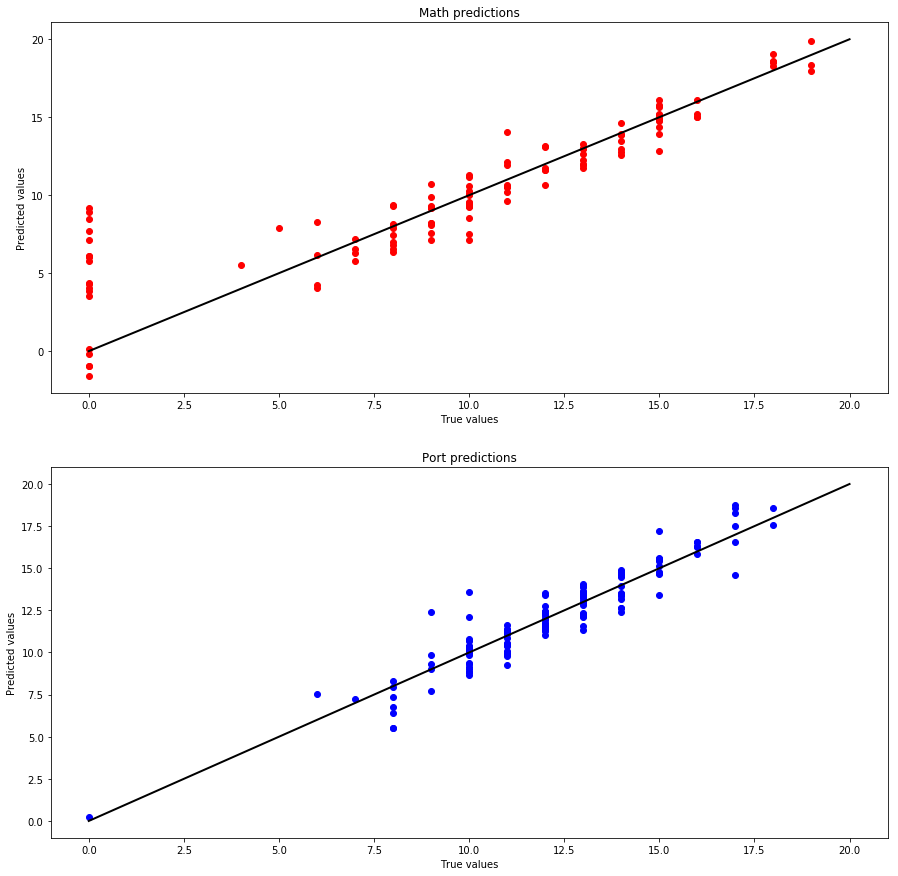

In [164]:
fig, (g1, g2) = plt.subplots(2,1,figsize=(15,15))

g1.scatter(ym_test,predictions_m, c='r')
g1.plot(x_real, y_real, c='black', linewidth=2)
g2.scatter(yp_test,predictions_p, c='b')
g2.plot(x_real, y_real, c='black', linewidth=2)
g1.set(title='Math predictions', xlabel='True values', ylabel='Predicted values')
g2.set(title='Port predictions', xlabel='True values', ylabel='Predicted values')


print("The R^2 for the Math Dataset in train is: ", model_m.score(Xm_train,ym_train))

print("The R^2 for the Math Datasets: ", model_m.score(Xm_test,ym_test))

print("The R^2 for the Portuguese Dataset in train is: ", model_p.score(Xp_train,yp_train))

print("The R^2 for the Portuguese Dataset: ", model_p.score(Xp_test,yp_test))

We can see that the Math dataset has a lower R^2, but this is due to several outliers on this dataset, since some students failed the class, which was not predicted.

This does not happen ofter in the Portuguese Dataset, which has a greater R^2

In [165]:
MSE_m = np.sqrt(mean_squared_error(ym_test, predictions_m))
MSE_p = np.sqrt(mean_squared_error(yp_test, predictions_p))

In [166]:
print("The Root Mean Squared Error for the Math Dataset is: ", MSE_m)

The Root Mean Squared Error for the Math Dataset is:  2.410878272826944


In [167]:
print("The Root Mean Squared Error for the Port Dataset is: ", MSE_p)

The Root Mean Squared Error for the Port Dataset is:  0.974953533305019


In [168]:
df_math_new['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [169]:
df_port_new['G3'].describe()

count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

In [170]:


## Had to use .squeeze() in order to turn the data indo 1D.

We can see that our root mean squared error for both cases are lower than the our Standart Deviation. I believe this is a satisfatory result for this case. Before we finish, I'll create a new file containing the Actual values and predicted values.

There are many 0 G3 grades on the math dataset, let me analyze it and check what may have happened.

In [171]:
grades = ['G1', 'G2', 'G3']

In [172]:
list_zeros_math = pd.DataFrame(df_math_new[grades].loc[df_math_new['G3']==0])
list_zeros_port = pd.DataFrame(df_port_new[grades].loc[df_port_new['G3']==0])

In [173]:
list_zeros_math.shape

(38, 3)

In [174]:
list_zeros_port

,G1,G2,G3
163,11,9,0
440,7,0,0
519,8,7,0
563,7,0,0
567,4,0,0
583,8,6,0
586,8,8,0
597,9,0,0
603,5,0,0
605,5,0,0


In [175]:
list_zeros_port.shape

(15, 3)

We can see that some students that got a 0 on G3 also received a 0 on G2 grade. Maybe those students didn't take the test, or didn't study due to a lower grade on G1. These data points seems to be discardable. We'll remove those cases from the dataset and check if the prediction improves

In [176]:
df_math_new.drop(df_math_new[df_math_new['G3']==0].index, inplace=True)
df_port_new.drop(df_port_new[df_port_new['G3']==0].index, inplace=True)

In [177]:
df_math_new.shape, df_port_new.shape

((357, 33), (634, 33))

In [178]:
Xm_new_train, Xm_new_test, ym_new_train, ym_new_test = train_test_split(df_math_new[features_math_new],df_math_new[targets_new], test_size=0.30, random_state=0)
Xp_new_train, Xp_new_test, yp_new_train, yp_new_test = train_test_split(df_port_new[features_port_new],df_port_new[targets_new], test_size=0.20, random_state=0)

In [179]:
model_new_m = LRm.fit(Xm_new_train, ym_new_train)
model_new_p = LRp.fit(Xp_new_train, yp_new_train)
predictions_new_m = model_new_m.predict(Xm_new_test)
predictions_new_p = model_new_p.predict(Xp_new_test)

The R^2 for the Math Datasets in train is:  0.9407194220246305
The R^2 for the Math Datasets:  0.9215041858294277
The R^2 for the Portuguese Datasets in train is:  0.8846550710560175
The R^2 for the Portuguese Datasetis:  0.8964379306766241


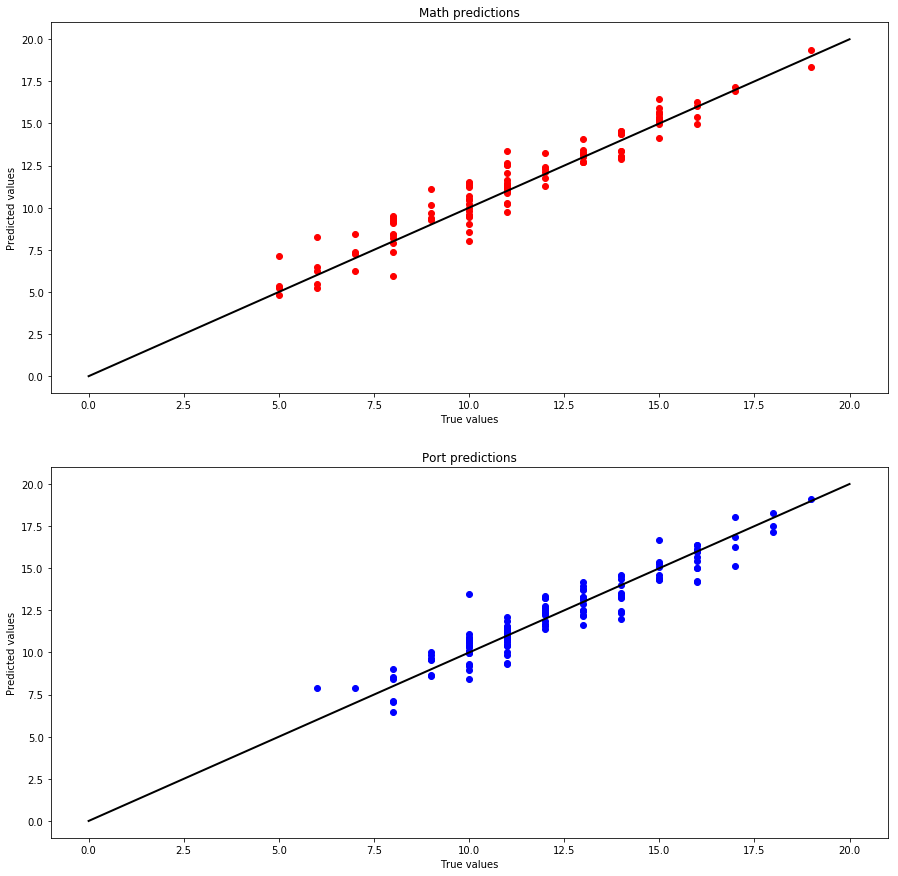

In [180]:
fig, (g1, g2) = plt.subplots(2,1,figsize=(15,15))

g1.scatter(ym_new_test,predictions_new_m, c='r')
g1.plot(x_real, y_real, c='black', linewidth=2)

g2.scatter(yp_new_test,predictions_new_p, c='b')
g2.plot(x_real, y_real, c='black', linewidth=2)

g1.set(title='Math predictions', xlabel='True values', ylabel='Predicted values')

g2.set(title='Port predictions', xlabel='True values', ylabel='Predicted values')

print("The R^2 for the Math Datasets in train is: ", model_new_m.score(Xm_new_train,ym_new_train))

print("The R^2 for the Math Datasets: ", model_new_m.score(Xm_new_test,ym_new_test))

print("The R^2 for the Portuguese Datasets in train is: ", model_new_p.score(Xp_new_train,yp_new_train))

print("The R^2 for the Portuguese Datasetis: ", model_new_p.score(Xp_new_test,yp_new_test))

In [181]:
MSE_new_m = np.sqrt(mean_squared_error(ym_new_test, predictions_new_m))
MSE_new_p = np.sqrt(mean_squared_error(yp_new_test, predictions_new_p))

print("The Root Mean Squared Error for the edited Math Dataset is: ", MSE_new_m)

print("The Root Mean Squared Error for the edited Port Dataset is: ", MSE_new_p)

The Root Mean Squared Error for the edited Math Dataset is:  0.8835560482506374
The Root Mean Squared Error for the edited Port Dataset is:  0.8594509093132213


In [182]:
predictions_new_m = predictions_new_m.squeeze()
ym_test = ym_test.squeeze()
predictions_new_p = predictions_new_p.squeeze()
yp_test = yp_test.squeeze()

In [183]:
file_m = pd.DataFrame({'Actual_value': ym_test, 'Predicted_Value':predictions_m, 'Difference':(ym_test-predictions_m)})

Exception: Data must be 1-dimensional

In [184]:
file_m.to_excel("Student Performence_mathematics.xlsx", index=False)

NameError: name 'file_m' is not defined

In [185]:
file_p = pd.DataFrame({'Actual_value': yp_test, 'Predicted_Value': predictions_p, 'Difference':(yp_test-predictions_p)})

Exception: Data must be 1-dimensional

In [186]:
file_p.to_excel("Student Performence_portuguese.xlsx", index=False)

NameError: name 'file_p' is not defined